# CUSTOMER CHURN PREDICTION

# A. Problem Statement ********************

A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

Your task as a data scientist would be to predict the propensity to churn for each customer


# Data Preprocessing
## A.1 Treating with missing values 

In [7]:

#for continuous---------------------------------


d['dependents']=d['dependents'].fillna(d['dependents'].mean())
d['city']=d['city'].fillna(d['city'].mean())
d['days_since_last_transaction']=d['days_since_last_transaction'].fillna(d['days_since_last_transaction'].mean())


#for categorical------------------------------


#d['gender'].value_counts()
#d['occupation'].value_counts()


#d['gender']=d['gender'].fillna(d['gender'].value_counts().idxmax(axis=0),inplace=True)
#d['occupation']=d['occupation'].fillna(d['occupation'].value_counts(axis=1).idxmax(),inplace=True)
d['gender'] = d['gender'].fillna("Male")
d['occupation'] = d['occupation'].fillna("self_employed")


d.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# A.2 Treating with outliers

<AxesSubplot:>

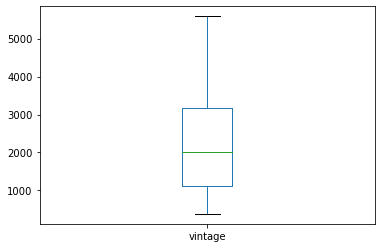

In [8]:
#for vintage var

#d['vintage'].plot(kind='box')

upper_lim = d['vintage'].quantile(.95)
lower_lim = d['vintage'].quantile(.05)

d.loc[(d['vintage'] > upper_lim),'vintage'] = upper_lim
d.loc[(d['vintage'] < lower_lim),'vintage'] = lower_lim

d['vintage'].plot(kind='box')


<AxesSubplot:>

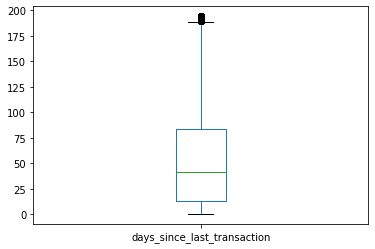

In [9]:
#for column days_since_last_transaction

#d['days_since_last_transaction'].plot(kind='box')

upper_lim = d['days_since_last_transaction'].quantile(.90)
lower_lim = d['days_since_last_transaction'].quantile(.05)

d.loc[(d['days_since_last_transaction'] > upper_lim),'days_since_last_transaction'] = upper_lim
d.loc[(d['days_since_last_transaction'] < lower_lim),'days_since_last_transaction'] = lower_lim


d['days_since_last_transaction'].plot(kind='box')


In [11]:
d

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135.0,66,Male,0.000000,self_employed,187.000000,2,755,194.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,383.0,35,Male,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356.0,31,Male,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478.0,90,Male,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531.0,42,Male,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845.0,10,Female,0.000000,student,1020.000000,2,1207,70.000000,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919.0,34,Female,0.000000,self_employed,1046.000000,2,223,14.000000,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,383.0,47,Male,0.000000,salaried,1096.000000,2,588,0.000000,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585.0,50,Male,3.000000,self_employed,1219.000000,3,274,69.997814,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


# B. Feature engineering

# B.1 Label encoding for categorical variables

In [12]:
#for gender variable
#d['gender'].value_counts()
#d.loc[d['gender']=='Male','gender_num']=1
#d.loc[d['gender']=='Female','gender_num']=0
#d.drop('gender',axis=1,inplace=True)

#d['occupation'].value_counts()

#for occupation variable
#d.loc[d['occupation']=='self_employed','occu_num']=0
#d.loc[d['occupation']=='salaried','occu_num']=1
#d.loc[d['occupation']=='student','occu_num']=2
#d.loc[d['occupation']=='retired','occu_num']=3
#d.loc[d['occupation']=='company','occu_num']=4
#d.drop('occupation',axis=1,inplace=True)
#d.drop('customer_id',axis=1,inplace=True) #as customer_id is not required for classification

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

d['gender']=enc.fit_transform(d['gender'])
d['occupation']=enc.fit_transform(d['occupation'])
d

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135.0,66,1,0.000000,3,187.000000,2,755,194.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,383.0,35,1,0.000000,3,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356.0,31,1,0.000000,2,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478.0,90,1,0.347236,3,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531.0,42,1,2.000000,3,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845.0,10,0,0.000000,4,1020.000000,2,1207,70.000000,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919.0,34,0,0.000000,3,1046.000000,2,223,14.000000,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,383.0,47,1,0.000000,2,1096.000000,2,588,0.000000,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585.0,50,1,3.000000,3,1219.000000,3,274,69.997814,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


<AxesSubplot:>

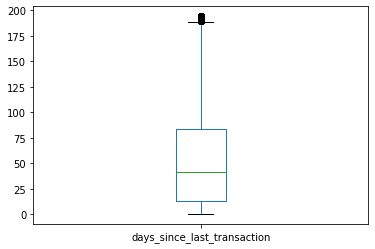

In [13]:
d['days_since_last_transaction'].plot(kind='box')

In [14]:
x=d.drop('churn',axis=1).values
y=d['churn'].values

In [15]:
x.shape

(28382, 20)

# Distribution for continuous variable

In [16]:
d.drop('customer_id',axis=1,inplace=True)
d.describe()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,2334.927172,48.208336,0.601543,0.347236,2.689451,796.109576,2.225530,925.975019,62.226656,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,1519.911059,17.807163,0.489589,0.953388,0.714303,426.704413,0.660443,937.799129,61.393306,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,383.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,1121.000000,36.000000,0.000000,0.000000,2.000000,409.000000,2.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,2018.000000,46.000000,1.000000,0.000000,3.000000,834.000000,2.000000,572.000000,41.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,3176.000000,60.000000,1.000000,0.000000,3.000000,1096.000000,3.000000,1440.000000,83.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,5586.900000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,194.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [19]:
d['average_monthly_balace_prev_total_quarter'] = d.average_monthly_balance_prevQ + d.average_monthly_balance_prevQ2
d=d.drop(['average_monthly_balance_prevQ','average_monthly_balance_prevQ2'],axis=1)
d

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,average_monthly_balace_prev_total_quarter
0,3135.0,66,1,0.000000,3,187.000000,2,755,194.000000,1458.71,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2907.78
1,383.0,35,1,0.000000,3,796.109576,2,3214,60.000000,5390.37,8704.66,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,20218.67
2,2356.0,31,1,0.000000,2,146.000000,2,41,69.997814,3913.16,5815.29,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,7726.11
3,478.0,90,1,0.347236,3,1020.000000,2,582,147.000000,2291.91,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,3091.08
4,2531.0,42,1,2.000000,3,1494.000000,3,388,58.000000,927.72,1401.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,3514.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845.0,10,0,0.000000,4,1020.000000,2,1207,70.000000,1076.43,1076.43,0.30,0.30,0.30,0.30,1076.43,1076.43,0,5069.89
28378,4919.0,34,0,0.000000,3,1046.000000,2,223,14.000000,3844.10,4069.21,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,7534.38
28379,383.0,47,1,0.000000,2,1096.000000,2,588,0.000000,65511.97,61017.55,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,75370.62
28380,2585.0,50,1,3.000000,3,1219.000000,3,274,69.997814,1625.55,1625.55,0.20,0.20,0.20,0.20,1625.55,1625.55,0,3540.62


<AxesSubplot:ylabel='Frequency'>

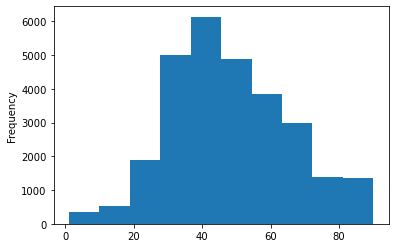

In [20]:
#univariate analysis
d.age.plot(kind='hist')

# splitting the dataset

In [21]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=5).fit(x)
#x_red=pca.transform(x)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=150)


#  Dimension reduction(Feature selection)
#### (using Person's correlation)

Sometimes, feature selection is mistaken with dimensionality reduction. But they are different. Feature selection is different from dimensionality reduction. Both methods tend to reduce the number of attributes in the dataset, but a dimensionality reduction method does so by creating new combinations of attributes (sometimes known as feature transformation), whereas feature selection methods include and exclude attributes present in the data without changing them.

Some examples of dimensionality reduction methods are Principal Component Analysis, Singular Value Decomposition, Linear Discriminant Analysis, etc.

Some examples for different types of general feature selection methods - Filter methods(chi square test, correlation), Wrapper methods(recursive feature elimination), and Embedded methods(ridge regression).


For feature selection using person's correlation what we will do ,, we make matrix of those feaures to each other which pair of features of have greater than threshold value(ideally we take 80 to 85 as threshold value) we will remove one out of them feature for model building.

Effects of using highly correlated feaures to a single model are: 

 >hepls to reduce dimensionality and reduce noise
 
 >helps to being overfitting
 
 >Reduces the time train to the model
 
 >Reduces accuracy of the model hence does not perform accurate result with new data

<AxesSubplot:>

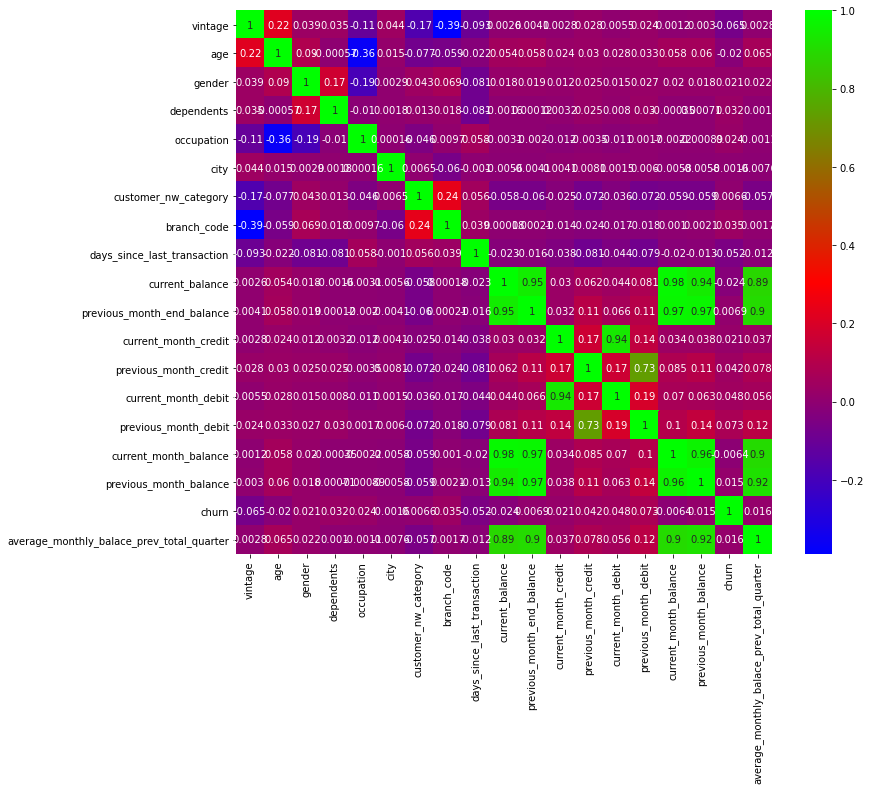

In [22]:
d.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor=d.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.brg)

In [23]:
#with the following function we can select highly correlated features
#it will remove first feature which is highly correlated with anything other features

#list1=list(d.columns)  #as we cannot calculate correlation from an array(ie; x_train) so we convert them into new dataset 
#x_train_new=pd.DataFrame(x_train,columns=list1[:-1])


column_with_corr=set() #set of all names of correlated columns
corr_matrix=d.corr()            #i only go for train dataset instead of whole because of overfitting
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i,j] > 0.90: 
            res=corr_matrix.columns[i] #it will return the name of the column
            column_with_corr.add(res)
column_with_corr    

{'average_monthly_balace_prev_total_quarter',
 'current_month_balance',
 'current_month_debit',
 'previous_month_balance',
 'previous_month_end_balance'}

In [24]:
d=d.drop(column_with_corr,axis=1)

In [25]:
final_cols=d.columns
d


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,previous_month_debit,churn
0,3135.0,66,1,0.000000,3,187.000000,2,755,194.000000,1458.71,0.20,0.20,0.20,0
1,383.0,35,1,0.000000,3,796.109576,2,3214,60.000000,5390.37,0.56,0.56,100.56,0
2,2356.0,31,1,0.000000,2,146.000000,2,41,69.997814,3913.16,0.61,0.61,259.23,0
3,478.0,90,1,0.347236,3,1020.000000,2,582,147.000000,2291.91,0.47,0.47,2143.33,1
4,2531.0,42,1,2.000000,3,1494.000000,3,388,58.000000,927.72,0.33,714.61,1538.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845.0,10,0,0.000000,4,1020.000000,2,1207,70.000000,1076.43,0.30,0.30,0.30,0
28378,4919.0,34,0,0.000000,3,1046.000000,2,223,14.000000,3844.10,1.71,2.29,1014.07,0
28379,383.0,47,1,0.000000,2,1096.000000,2,588,0.000000,65511.97,4666.84,3883.06,71.80,1
28380,2585.0,50,1,3.000000,3,1219.000000,3,274,69.997814,1625.55,0.20,0.20,0.20,0


In [26]:
x=d.drop('churn',axis=1).values
y=d['churn'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=150)


In [27]:
d

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,previous_month_debit,churn
0,3135.0,66,1,0.000000,3,187.000000,2,755,194.000000,1458.71,0.20,0.20,0.20,0
1,383.0,35,1,0.000000,3,796.109576,2,3214,60.000000,5390.37,0.56,0.56,100.56,0
2,2356.0,31,1,0.000000,2,146.000000,2,41,69.997814,3913.16,0.61,0.61,259.23,0
3,478.0,90,1,0.347236,3,1020.000000,2,582,147.000000,2291.91,0.47,0.47,2143.33,1
4,2531.0,42,1,2.000000,3,1494.000000,3,388,58.000000,927.72,0.33,714.61,1538.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845.0,10,0,0.000000,4,1020.000000,2,1207,70.000000,1076.43,0.30,0.30,0.30,0
28378,4919.0,34,0,0.000000,3,1046.000000,2,223,14.000000,3844.10,1.71,2.29,1014.07,0
28379,383.0,47,1,0.000000,2,1096.000000,2,588,0.000000,65511.97,4666.84,3883.06,71.80,1
28380,2585.0,50,1,3.000000,3,1219.000000,3,274,69.997814,1625.55,0.20,0.20,0.20,0


In [28]:
x_train.shape

(21286, 13)

# Feature scaling

*StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values . Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.

* StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

*MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] . However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

* we should do feature scaling which machine learning algorithm involves euclidean distance (like KNN and K Means clustering ),linear regression, logisic regression and also some deep leanrning techniques,ANN,CNN and machine learning algorithm too where gradient decent basically involved(Gradient basically works on a parabola/curve and we need to find the global minimum distance or best minimal parameter), so in order to retrieve that parameter or distance point we need feature scaling .

* we should not use this feature scaling on boosting techniques like decision tree, random forest ,XG boost,beacuse at the end of the evaluation we are creating a decision tree based on their best features.

## Why to Normalization/Standardization prior to model fitting?


The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

<AxesSubplot:>

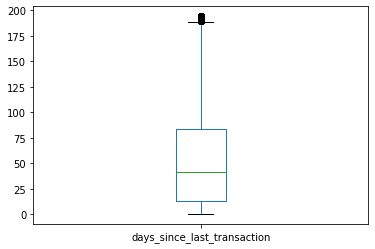

In [29]:
d['days_since_last_transaction'].plot.box()

# Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
x_train_sc=scl.fit_transform(x_train)
x_test_sc=scl.fit_transform(x_test)

# KNN------------------------------------------

## Finding right value of K


## Way-1
## Accuracy comparing 

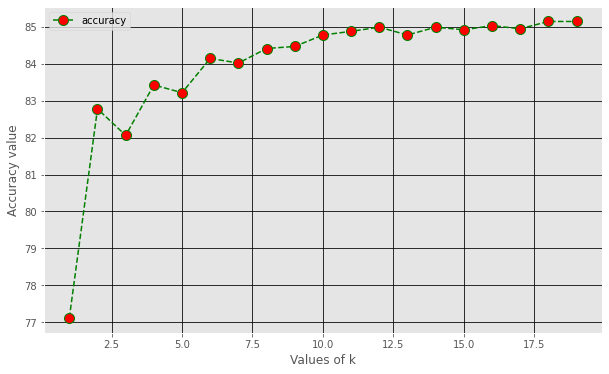

In [31]:
#calculate accuracy using K nearest classifier
from sklearn.neighbors import KNeighborsClassifier

results=[]
for i in range(1,20):
   clf1=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
   y_pred=clf1.predict(x_test)
   d=accuracy_score(y_test,y_pred)*100
   results.append(d)
results


#choose the right value for k
import matplotlib.pyplot as p
from matplotlib import style as s
s.use('ggplot')
l=list(range(1,20))
p.figure(figsize=(10,6))
p.plot(l,results,'g',label='accuracy', linestyle='dashed',marker='o', markerfacecolor='red', markersize=10)
p.legend() 
p.xlabel("Values of k")
p.ylabel("Accuracy value")
p.grid(True,color='k')

#p.figure(figsize=(10,10))
#p.show()

# Way-2
# Elbow method

Text(0, 0.5, 'Error Rate')

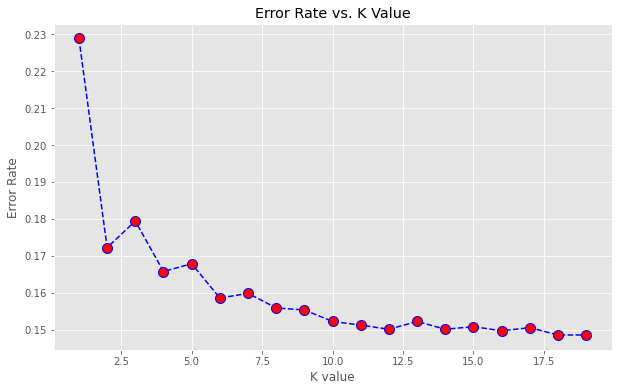

In [32]:
li_error_rate = []
# Will take some time
for i in range(1,20):
   clf2 = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
   pred_i = clf2.predict(x_test)
   li_error_rate.append(np.mean(pred_i != y_test))
    
p.figure(figsize=(10,6))
p.plot(range(1,20),li_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
p.title('Error Rate vs. K Value')
p.xlabel('K value')
p.ylabel('Error Rate')

# Final Result

In [54]:
clf_1=KNeighborsClassifier(n_neighbors=18).fit(x_train,y_train)
y_pred=clf_1.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

#By not applying any feature scaling we got the accuracy 0.85
#while performing with minmaxscaler we got the accuracy 0.83
#while performing with Standardscaler we got the accuracy 0.82
#performing PCA we got the accuracy 0.83

0.8514656144306652

# checking for overfitting

In [55]:
#check for overfitting or underfitting
accuracy_score(clf_1.predict(x_train),y_train)

0.8491966550784553

# Decision Tree----------------------------------

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier(criterion='entropy',max_depth=10).fit(x_train,y_train)
y_pred2=clf2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8455467869222097

# Accuracy comparison with different models 

In [57]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=18)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=10)))
models.append(('RF',RandomForestClassifier(criterion='entropy')))
models.append(('NB',GaussianNB()))
models.append(('svm',SVC()))

clf=[]
models_accuracy=[]
for i,j in models:
    clf.append(j.fit(x_train,y_train))
for i in clf:
    models_accuracy.append(accuracy_score(y_test,i.predict(x_test)))
models_accuracy

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[0.822435174746336,
 0.8514656144306652,
 0.8461104847801578,
 0.8575253664036077,
 0.8203213077790305,
 0.8234216459977453]

# Importance of each variable to the model

<AxesSubplot:>

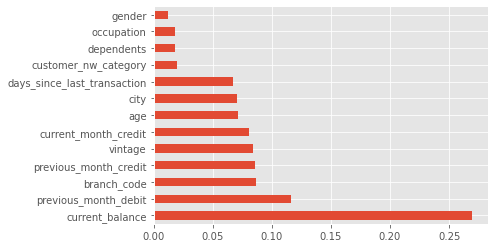

In [48]:
classifier1=RandomForestClassifier().fit(x_train,y_train)
y_pred=classifier1.predict(x_test)
#accuracy_score(y_pred,y_test)

this_col=list(final_cols)
feat_importances = pd.Series(classifier1.feature_importances_, index=this_col[:-1])
feat_importances.nlargest(15).plot(kind='barh')

In [59]:
#got SVM have higher accuracy
import pandas as pd
import plotly.graph_objects as pg

#d=pd.DataFrame({"x":x,"accuracy":models_accuracy})
#pol=pg. (d,x=x,y=models_accuracy)
#pol.show()

fig=pg.Figure()
fig.add_trace(pg.Scatter(x=['LR','KNN','DT','RF','NV','SVM'],
                           y=list(models_accuracy)
))

# Evaluation metrics

In [60]:
from sklearn.metrics import confusion_matrix


print("Confusion matrix:\n",confusion_matrix(y_pred,y_test))

Confusion matrix:
 [[5629  844]
 [ 210  413]]


# Save the model for future work

In [61]:
from joblib import dump, load
dump(clf_1, 'churn_prediction_brain.joblib')  #to save the model 

['churn_prediction_brain.joblib']

In [66]:
#accessing the model from joblib file
myclf=load('churn_prediction_brain.joblib')

myclf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [28]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: D:\Anaconda\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: None
setuptools: 45.2.0.post20200210
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 1.0.1
matplotlib: 3.3.0
    joblib: 0.14.1

Built with OpenMP: True
